In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

housing = pd.read_csv('ds620_pe03_housing.csv')
#housing = pd.read_csv('../input/housing/ds620_pe03_housing.csv')

In [6]:
#note the shape of the dataset
housing.shape


(20640, 2)

In [7]:
#inspect the top of the dataset
housing.head()


,median_income,median_house_value
0,8.3252,452600
1,8.3014,358500
2,7.2574,352100
3,5.6431,341300
4,3.8462,342200


In [8]:
#inspect the bottom of the dataset
housing.tail()

,median_income,median_house_value
20635,1.5603,78100
20636,2.5568,77100
20637,1.7000,92300
20638,1.8672,84700
20639,2.3886,89400


### Question #1
- Consider y = median_house_value as our output and x = median_income as our input

- What the mathematical formula for the regression line with x as input and y as output?

Formula
$$
\hat{y} = \beta_0 + \beta_1 x
$$

Explanation:

predicted house value equals the value of y when x equals 0 plus the change in y for one unit change in x times median income

median_house_value = β0​ + β1​ × median_income

In [9]:
# Let's assign x and y
X = housing.iloc[:, 0].values.reshape(-1, 1)
y = housing.iloc[:, 1]

### Question # 2
- Since housing is a dataframe you can use the plot function directly on housing.

- Plot the scatter plot of "median_income" and "median_house_value".

- Make sure the x-axis is labeled "median_income" and the y-axis is labeled "median_house_value"

- Show the plot in the notebook

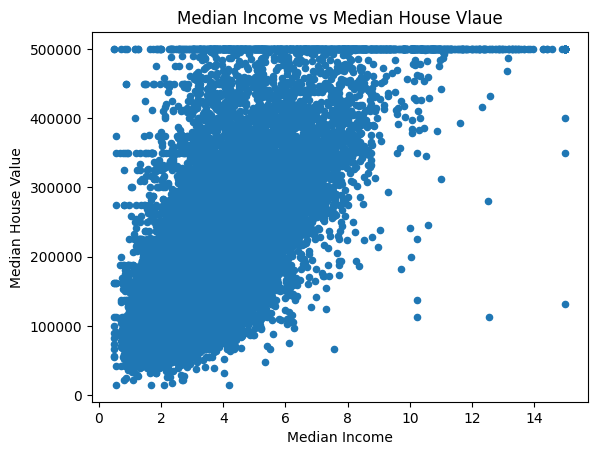

In [10]:
# Scatter Plot of median_income vs median_house_value
housing.plot(
    kind = "scatter",
    x = "median_income",
    y = "median_house_value",
    title = "Median Income vs Median House Vlaue"
)
# axis labels
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
# display scatter plot
plt.show()

### Question #3
- To ensure everyone's results are the same, set the random seed to (10) using the function random.seed()

- Don't forget the related import

In [11]:
import random

# Set random seed
random.seed(10)

### Question #4
- Split the datasets into training and test sets using 30% of the data for testing.

- Remember: housing_medium_house_value is the y and the income is the x

In [12]:
# Split data into train and test sets 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10) #REPLACE THIS WITH THE CORRECT PARAMETERS)

In [15]:
#Using scikit-learn to build a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Question #5
- What are the y_intercept and the slope produced by the lr model you just trained?

- See "The Normal Equation" Section in Chapter 4 to find out how to get the intercept and slope

- Show the functions used below

In [16]:
# Intercept
intercept = lr.intercept_
print(f"Intercept: {intercept}")

# Slope / Coefficient
slope = lr.coef_[0]
print(f"Slope: {slope}")

Intercept: 45089.409277618426
Slope: 41811.368177445904


### Question #6
- Redo the plot from question #2, but this time show the regression line in the color red

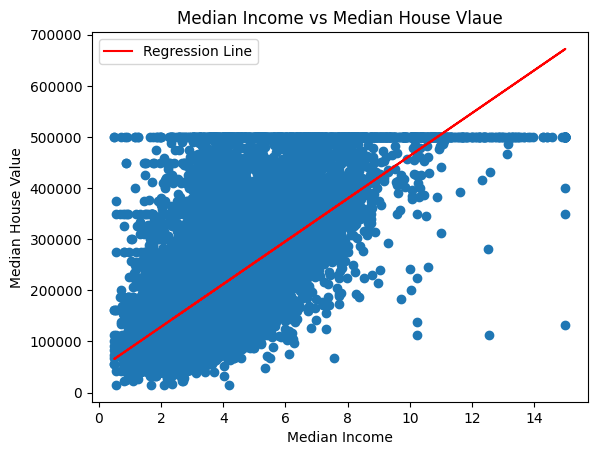

In [18]:
# Scatter Plot of median_income vs median_house_value with regression line
plt.scatter(X, y)

# Regression line
plt.plot(X, lr.predict(X), color = "red", label = "Regression Line")

# axis labels / title
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Vlaue")

plt.legend()

# display scatter plot
plt.show()

### Question #7
- What is the predicted house value for the following income values:

        a) 3.8

        b) 8.5

-  What is the MSE for the trained model?

In [20]:
# Define new income values as 2D array
new_incomes = np.array([[3.8], [8.5]])

# Predict vlaues for the incomes
predicted_values = lr.predict(new_incomes)
print(f"Income 3.8 predicted value: {predicted_values[0]:.2f}")
print(f"\nIncome 8.5 predicted value: {predicted_values[1]:.2f}")

# Training data MSE
y_train_pred = lr.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"\nTraining data MSE: {mse_train:.2f}")

Income 3.8 predicted value: 203972.61

Income 8.5 predicted value: 400486.04

Training data MSE: 6968202097.94


In [28]:
# BATCH GRADIENT DESCENT
# use the block of code below to find the slope and y-intercept of the regression line through the income (x) and value (y) scatter plot

# Building the model
m = 0 #initialize slope
b = 0 #initialize y_intercept

eta = 0.01  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # number of elements in X

# Performing Gradient Descent
for i in range(epochs):
    y_pred = m*X + b  # The current predicted value of y
    D_m = (-2/n) * sum(X * (y - y_pred))  # Derivative wrt m
    D_b = (-2/n) * sum(y - y_pred)  # Derivative wrt b
    m = m - eta * D_m  # Update m
    b = b - eta * D_b  # Update c

print (m, b)


ValueError: Data must be 1-dimensional, got ndarray of shape (20640, 20640) instead

### Question #8
- Change the code block into a Python function that takes the learning rate eta as an argument and outputs the slope m and y_intercept b

- Call the function linear_GD and write it into the cell below.

In [25]:
def linear_GD(eta_):
    """
    Perform batch gradient descent for simple linear regression.

    Parameters:
    eta_ : float
        Learning rate

    Returns:
    m : float
        Slope of the regression line
    b : float
        Intercept of the regression line
    """
    # Flatten X and y to 1D arrays
    X_flat = X.flatten()
    y_array = y.values

    # Initialize parameters
    m = 0
    b = 0
    n = float(len(X_flat))
    epochs = 1000  # number of iterations

    # Gradient Descent loop
    for i in range(epochs):
        y_pred = m * X_flat + b
        D_m = (-2/n) * np.sum(X_flat * (y_array - y_pred))
        D_b = (-2/n) * np.sum(y_array - y_pred)
        m = m - eta_ * D_m
        b = b - eta_ * D_b

    return m, b


In [26]:
slope, intercept = linear_GD(eta_ = 0.01)
print(f"Slope: {slope}, Intercept: {intercept}")

Slope: 41969.814129884784, Intercept: 44248.853791626025


### Question #9
- Run the linear_GD function for values of eta=0.001, eta = 0.1, and eta = 0.5

- What are the slope and intercept values for each eta?

- What are your observations as the learning rate increases?

In [31]:
etas = [0.001, 0.1, 0.5]

# Run linear_GD for each eta
for eta_val in etas:
  slope, intercept = linear_GD(eta_val)
  print(f"Learning Rate {eta_val}")
  print(f"Slope: {slope:.2f}")
  print(f"Intercept: {intercept:.2f}\n\n")

Learning Rate 0.001
Slope: 46832.72
Intercept: 21125.45


Learning Rate 0.1
Slope: nan
Intercept: nan




/tmp/ipython-input-1763925970.py:30: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - eta_ * D_m


Learning Rate 0.5
Slope: nan
Intercept: nan




- As the learning rate increases gradient descent converges faster.

- If the learning value is too large, it becomes unstable and returns nan values.

### Question #10
- Plot the X, y scatter plot again, this time add the four regression lines based on m and b found with eta=0.001, 0.01, 0.1, and 0.5 found above.

- Use different colors and a legend to indicate the associated learning rate.

/tmp/ipython-input-1763925970.py:30: RuntimeWarning: invalid value encountered in scalar subtract
  m = m - eta_ * D_m


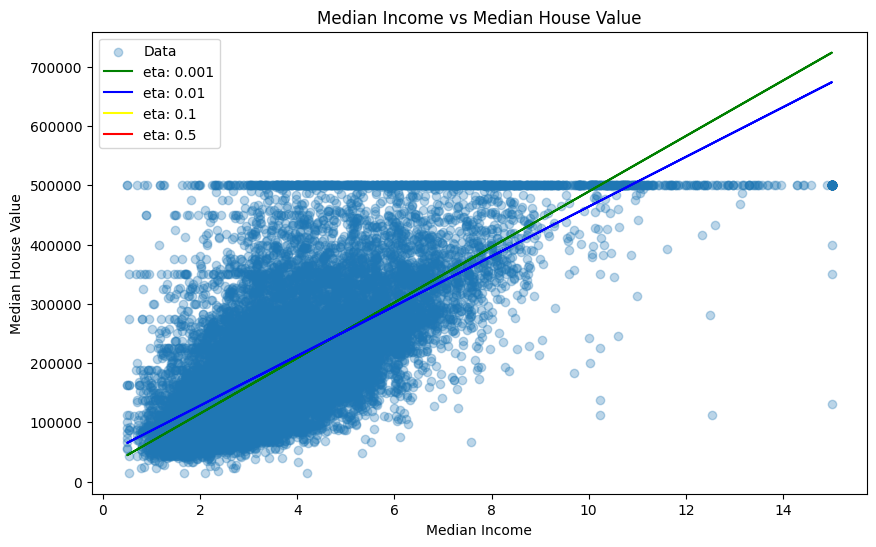

In [33]:
# Learning rates and Color Codes
etas = [0.001, 0.01, 0.1, 0.5]
colors = ["green", "blue", "yellow", "red"]

# Initialize plot
plt.figure(figsize = (10, 6))
plt.scatter(X, y, alpha = 0.3, label = "Data")

# Plot regression lines
for eta_val, color in zip(etas, colors):
  slope, intercept = linear_GD(eta_val)
  plt.plot(X, slope * X + intercept, color = color, label = f"eta: {eta_val}")

# Axis labels, title
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")
plt.legend()
plt.show()